In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
df = pd.read_csv('../data/base.csv')
os.makedirs('images',exist_ok=True)

In [3]:
df.columns

Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'EducationLevel', 'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'MaritalStatus', 'LengthOfCreditHistory', 'AnnualIncome',
       'HomeOwnershipStatus', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'EmploymentStatus', 'SavingsAccountBalance', 'Age',
       'NumberOfCreditInquiries', 'JobTenure', 'DebtToIncomeRatio',
       'LoanApproved', 'NumberOfOpenCreditLines', 'LoanPurpose',
       'InterestRate', 'NumberOfDependents'],
      dtype='object')

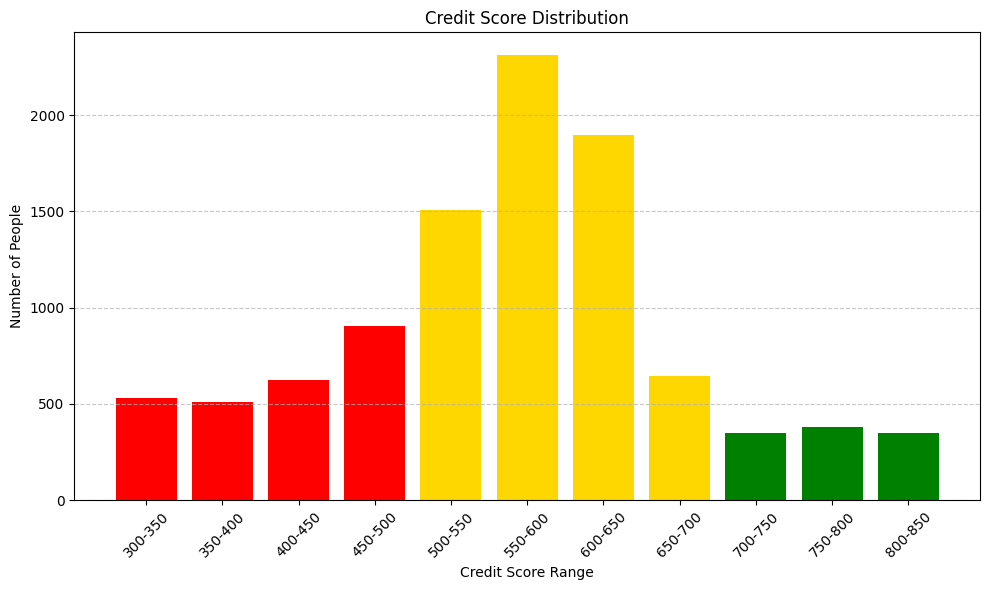

In [48]:
# Define bins and labels
bins = np.arange(300, 851, 50)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Bin the CreditScore data
df['CreditScoreBin'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Count the number of people in each bin
score_counts = df['CreditScoreBin'].value_counts().sort_index()

# Define bar colors based on bin ranges
colors = ['red' if int(label.split('-')[0]) < 500 else 
          'gold' if int(label.split('-')[0]) < 700 else 
          'green' for label in labels]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(score_counts.index, score_counts.values, color=colors)

# Customizing the plot
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("./images/fig1.png")
plt.show()

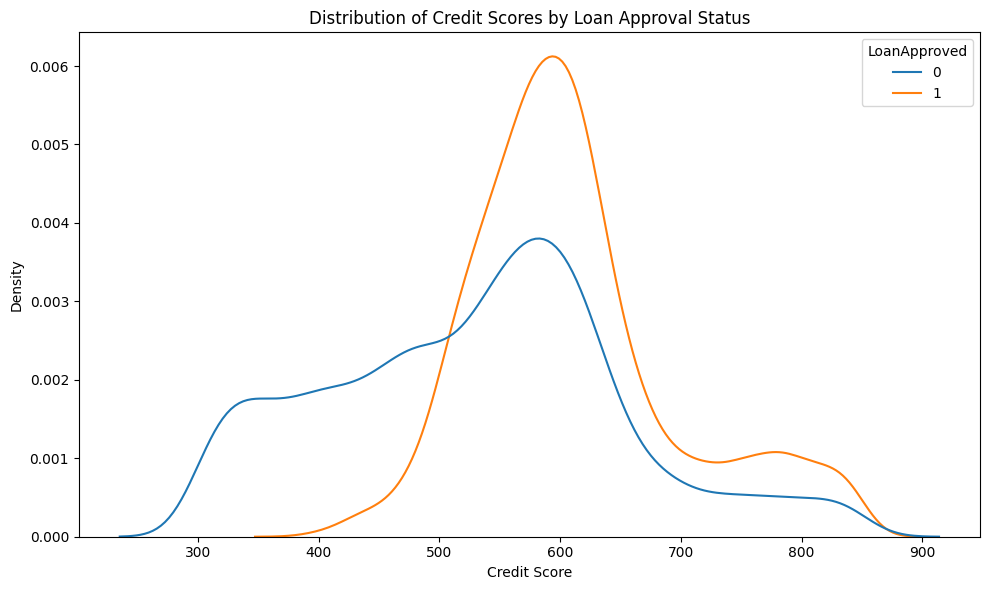

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CreditScore', hue='LoanApproved', common_norm=False)
plt.title('Distribution of Credit Scores by Loan Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('images/fig2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

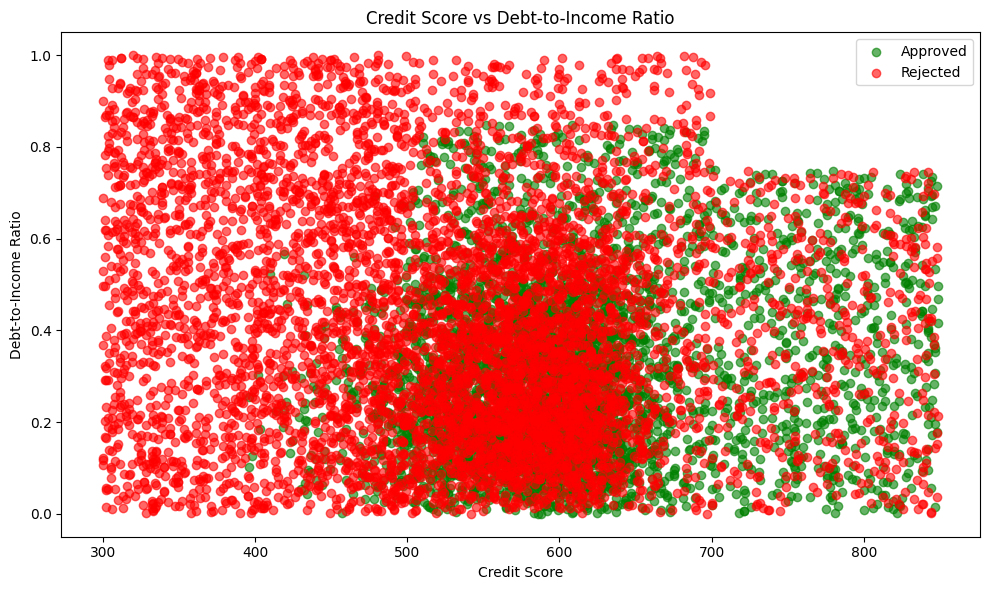

In [6]:
plt.figure(figsize=(10, 6))
approved = df[df['LoanApproved'] == 1]
rejected = df[df['LoanApproved'] == 0]

plt.scatter(approved['CreditScore'], approved['DebtToIncomeRatio'], 
           alpha=0.6, label='Approved', c='green')
plt.scatter(rejected['CreditScore'], rejected['DebtToIncomeRatio'], 
           alpha=0.6, label='Rejected', c='red')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Credit Score vs Debt-to-Income Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('images/fig3.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

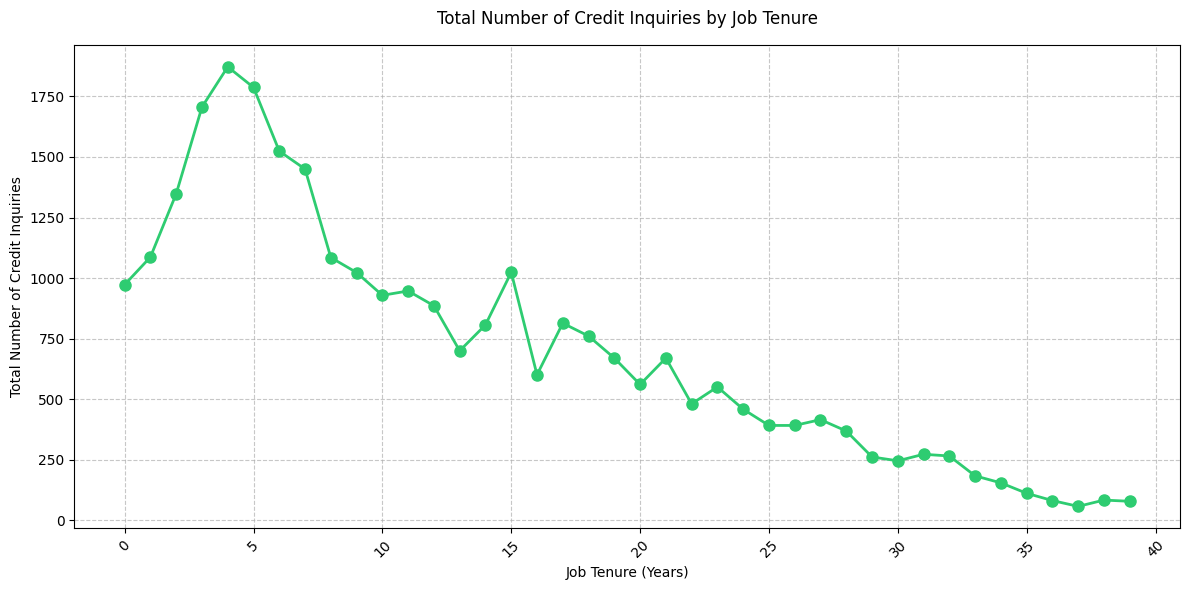

In [7]:
# Group by JobTenure and sum the NumberOfCreditInquiries
tenure_inquiries = df.groupby('JobTenure')['NumberOfCreditInquiries'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(tenure_inquiries['JobTenure'], 
         tenure_inquiries['NumberOfCreditInquiries'], 
         marker='o',  # Add markers at each data point
         linewidth=2, 
         markersize=8,
         color='#2ecc71')  # Use a nice green color

# Customize the plot
plt.title('Total Number of Credit Inquiries by Job Tenure', fontsize=12, pad=15)
plt.xlabel('Job Tenure (Years)', fontsize=10)
plt.ylabel('Total Number of Credit Inquiries', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value labels on top of each point
# for x, y in zip(tenure_inquiries['JobTenure'], tenure_inquiries['NumberOfCreditInquiries']):
#     plt.text(x, y + 0.5, f'{int(y)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./images/fig4.png')
plt.show()

/tmp/ipykernel_1967/3355769735.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



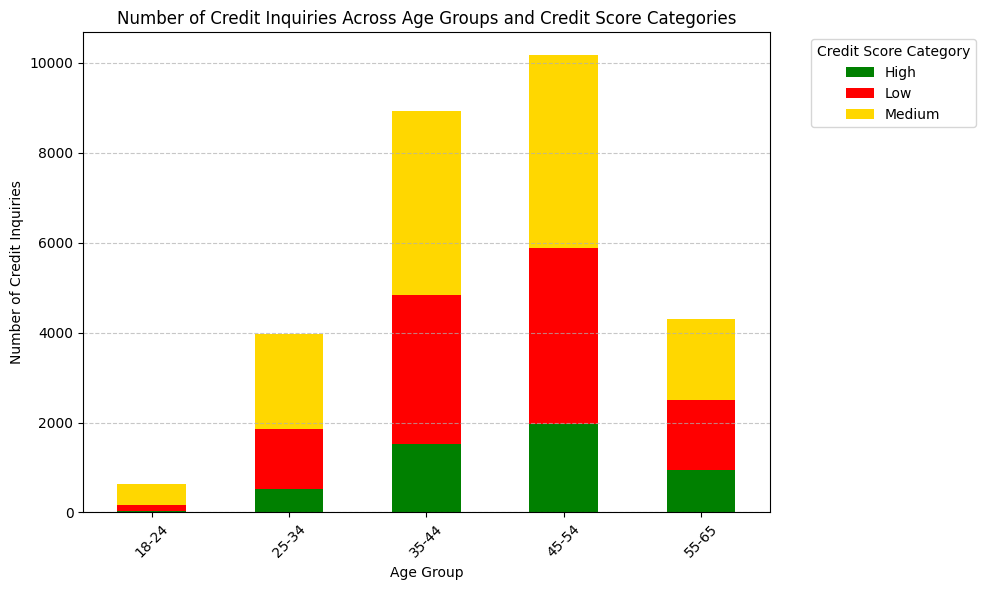

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for AgeGroup
bins = [18, 25, 35, 45, 55, 66]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Categorize Credit Score
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Group by AgeGroup and CreditScoreCategory, summing NumberOfCreditInquiries
grouped_data = df.groupby(['AgeGroup', 'CreditScoreCategory'])['NumberOfCreditInquiries'].sum().unstack()

# Define colors for categories
colors = {'Low': 'red', 'Medium': 'gold', 'High': 'green'}

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in grouped_data.columns])

# Customizing the plot
plt.title('Number of Credit Inquiries Across Age Groups and Credit Score Categories')
plt.xlabel('Age Group')
plt.ylabel('Number of Credit Inquiries')
plt.xticks(rotation=45)
plt.legend(title='Credit Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./images/fig5.png')
# Show the plot
plt.show()


In [56]:
import pandas as pd
import plotly.express as px

# Select relevant features and preprocess
features = ['NumberOfOpenCreditLines', 'LoanApproved', 'NumberOfCreditInquiries', 'DebtToIncomeRatio']
df_pcp = df[features].copy()

# Add CreditScoreCategory for coloring
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df_pcp['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Map CreditScoreCategory to numeric values for coloring
# Adjusting the numeric mapping to spread the colors more evenly
color_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
df_pcp['CreditScoreNumeric'] = df_pcp['CreditScoreCategory'].map(color_map)

# Plot using Plotly with adjusted color scale
fig = px.parallel_coordinates(
    df_pcp,
    color='CreditScoreNumeric',
    dimensions=features,
    color_continuous_scale=[
        [0, 'red'],
        [0.5, 'gold'],
        [1, 'lightgreen']
    ],
    labels={
        'NumberOfOpenCreditLines': 'Open Credit Lines',
        'LoanApproved': 'Loan Approved',
        'NumberOfCreditInquiries': 'Credit Inquiries',
        'DebtToIncomeRatio': 'Debt-to-Income Ratio',
    },
    range_color=[0, 1]  # Fix the color range explicitly
)

# Normalize all dimensions to [0,1] for consistent color display
fig.update_traces(dimensions=[
    dict(range=[df_pcp['NumberOfOpenCreditLines'].min(), df_pcp['NumberOfOpenCreditLines'].max()], 
         values=(df_pcp['NumberOfOpenCreditLines']),
         label='Open Credit Lines'),
    dict(range=[0, 1], 
         values=df_pcp['LoanApproved'],
         label='Loan Approved'),
    dict(range=[df_pcp['NumberOfCreditInquiries'].min(), df_pcp['NumberOfCreditInquiries'].max()], 
         values=(df_pcp['NumberOfCreditInquiries']),
         label='Credit Inquiries'),
    dict(range=[0, 1], 
         values=df_pcp['DebtToIncomeRatio'],
         label='Debt-to-Income Ratio'),
])

# Show the plot
fig.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
# Step 1: Create the Target Classes
# Classify Credit Score into Low, Medium, High
def classify_credit_score(score):
    if score < 500:
        return "Low"
    elif score < 700:
        return "Medium"
    else:
        return "High"

df['CreditScoreCategory'] = df['CreditScore'].apply(classify_credit_score)

# Define Features and Categorical Target
features = ['Age', 'JobTenure', 'NumberOfCreditInquiries', 'LoanApproved', 'DebtToIncomeRatio']
target = 'CreditScoreCategory'

X = df[features]
y = df[target]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=347)

# Step 2: Initial Model (Naive Bayes with original features)
naive_bayes_initial = GaussianNB()
naive_bayes_initial.fit(X_train, y_train)
y_pred_initial = naive_bayes_initial.predict(X_test)

# Evaluate Initial Model
print("Initial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_initial))
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print(f"Initial Naive Bayes Accuracy: {accuracy_initial}")



Initial Naive Bayes Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.20      0.26       240
         Low       0.59      0.62      0.60       539
      Medium       0.75      0.80      0.78      1221

    accuracy                           0.68      2000
   macro avg       0.57      0.54      0.55      2000
weighted avg       0.66      0.68      0.67      2000

Initial Naive Bayes Accuracy: 0.682


In [ ]:
# Feature Engineering
# Creating a new feature based on domain logic
df['CreditUtilizationScore'] = (
    df['Age'] * -0.2 + 
    df['DebtToIncomeRatio'] * -0.35 + 
    df['LoanApproved'] * 0.25 + 
    df['NumberOfCreditInquiries'] * -0.35
)

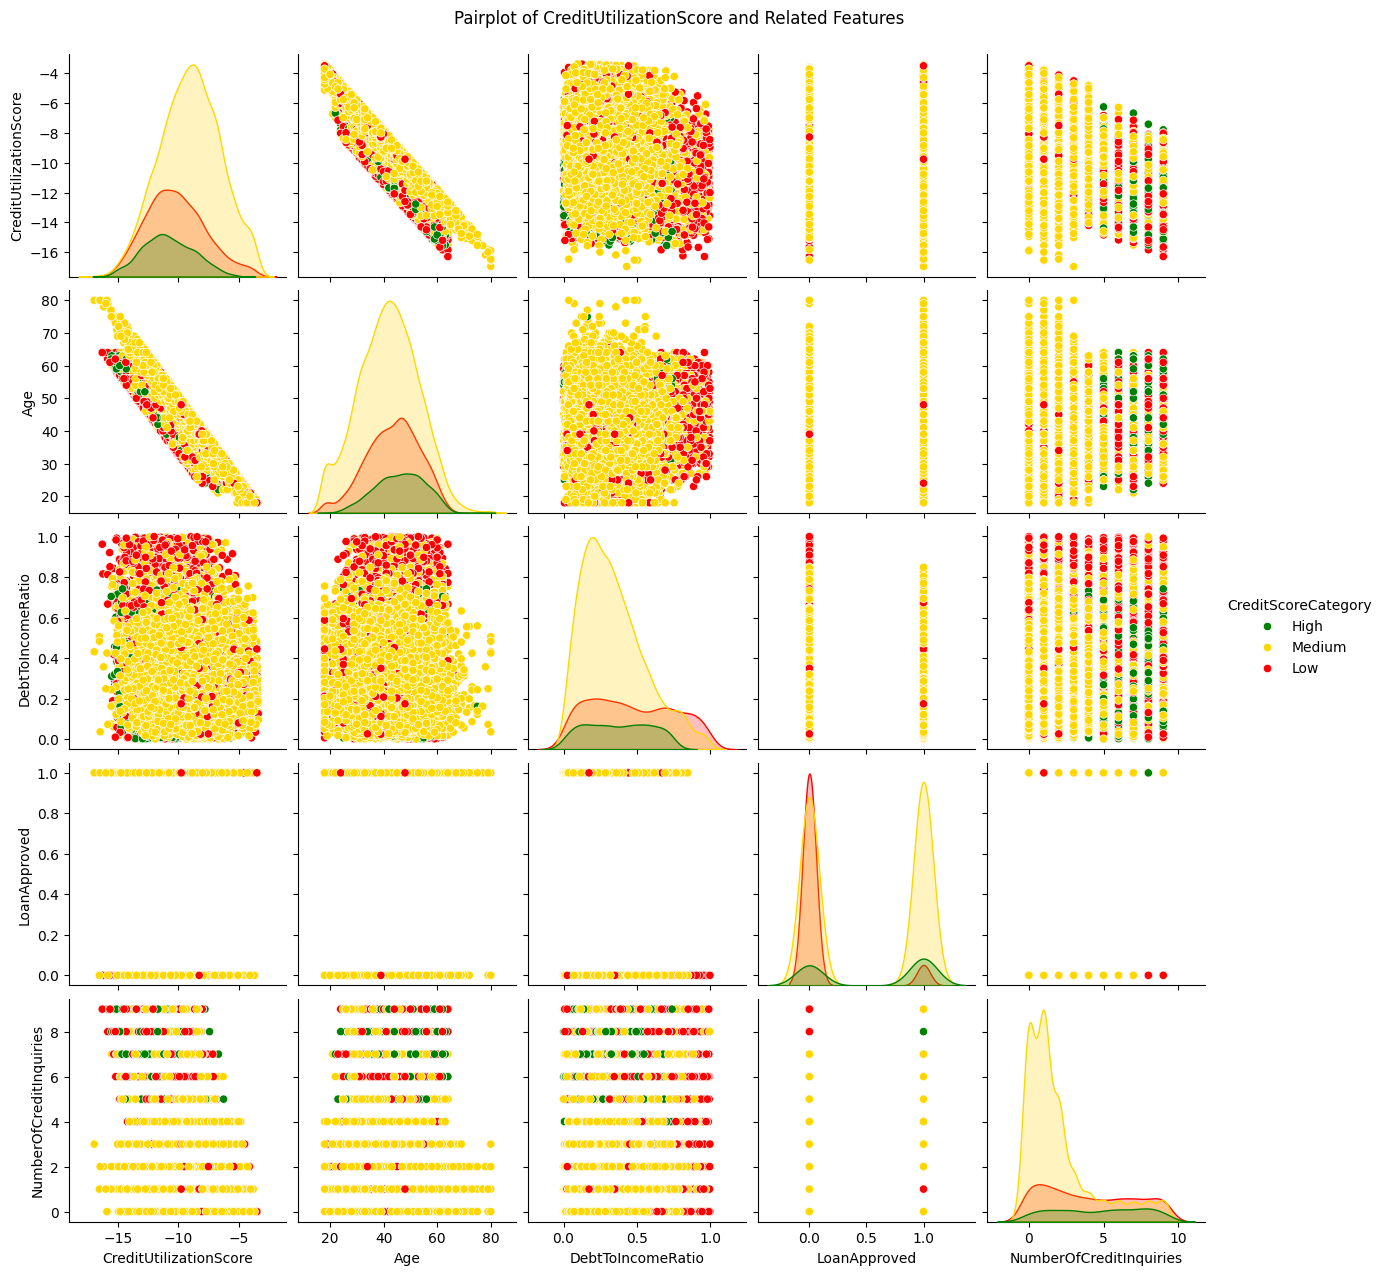

In [50]:
custom_palette = {'Low': 'red', 'Medium': 'gold', 'High': 'green'}
sns.pairplot(df, vars=['CreditUtilizationScore', 'Age', 'DebtToIncomeRatio', 'LoanApproved', 'NumberOfCreditInquiries'], 
             hue='CreditScoreCategory', palette=custom_palette, diag_kind='kde')
plt.suptitle('Pairplot of CreditUtilizationScore and Related Features', y=1.02)
plt.savefig('./images/fig6.png')
plt.show()


/tmp/ipykernel_1967/2351754440.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




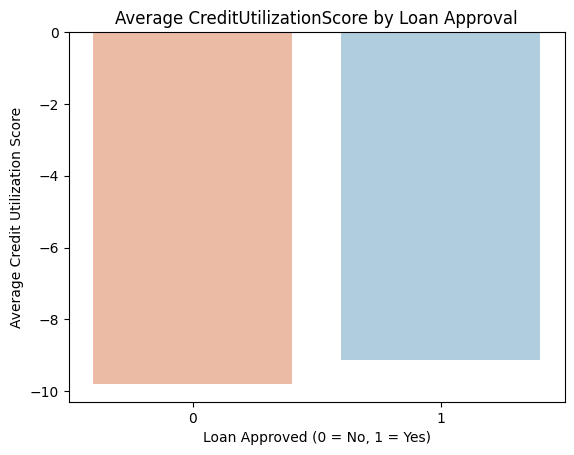

In [35]:
avg_scores = df.groupby('LoanApproved')['CreditUtilizationScore'].mean().reset_index()
sns.barplot(data=avg_scores, x='LoanApproved', y='CreditUtilizationScore', palette='RdBu')
plt.title('Average CreditUtilizationScore by Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Average Credit Utilization Score')
plt.savefig('./images/fig7.png')
plt.show()


/tmp/ipykernel_1967/2717559452.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




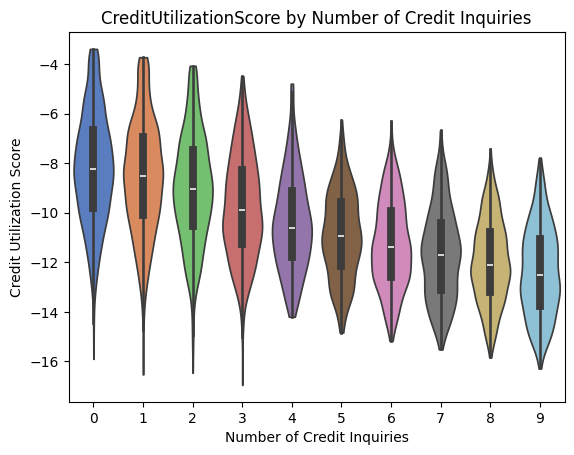

In [36]:
sns.violinplot(data=df, x='NumberOfCreditInquiries', y='CreditUtilizationScore', palette='muted', cut=0)
plt.title('CreditUtilizationScore by Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Credit Utilization Score')
plt.savefig('./images/fig8.png')
plt.show()


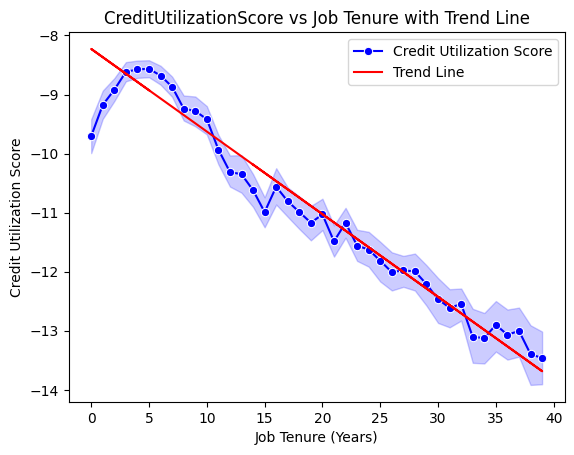

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Plotting the line chart
sns.lineplot(data=df, x='JobTenure', y='CreditUtilizationScore', marker='o', color='blue', label='Credit Utilization Score')

# Adding a trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['JobTenure'], df['CreditUtilizationScore'])
plt.plot(df['JobTenure'], slope * df['JobTenure'] + intercept, color='red', label='Trend Line')

# Title and labels
plt.title('CreditUtilizationScore vs Job Tenure with Trend Line')
plt.xlabel('Job Tenure (Years)')
plt.ylabel('Credit Utilization Score')

# Show legend
plt.legend()
plt.savefig("./images/fig9.png")
# Display the plot
plt.show()


In [ ]:


# Use all original features plus the engineered feature
features_refined = features + ['CreditUtilizationScore']
X_refined = df[features_refined]

# Split Data Again with the Refined Features
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_refined, y, test_size=0.2, random_state=808
)

naive_bayes_refined = GaussianNB()
naive_bayes_refined.fit(X_train_refined, y_train_refined)
y_pred_refined = naive_bayes_refined.predict(X_test_refined)

# Evaluate Refined Model
print("Refined Naive Bayes Classification Report:")
print(classification_report(y_test_refined, y_pred_refined))
accuracy_refined = accuracy_score(y_test_refined, y_pred_refined)

print(f"Initial Naive Bayes Accuracy: {accuracy_initial}")
print(f"Refined Naive Bayes Accuracy: {accuracy_refined}")

Refined Naive Bayes Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.32      0.36       171
         Low       0.60      0.67      0.64       483
      Medium       0.84      0.83      0.83      1346

    accuracy                           0.75      2000
   macro avg       0.62      0.61      0.61      2000
weighted avg       0.74      0.75      0.75      2000

Refined Naive Bayes Accuracy: 0.7475

Comparison:
Initial Naive Bayes Accuracy: 0.682
Refined Naive Bayes Accuracy: 0.7475
The refined model with feature engineering performs better.


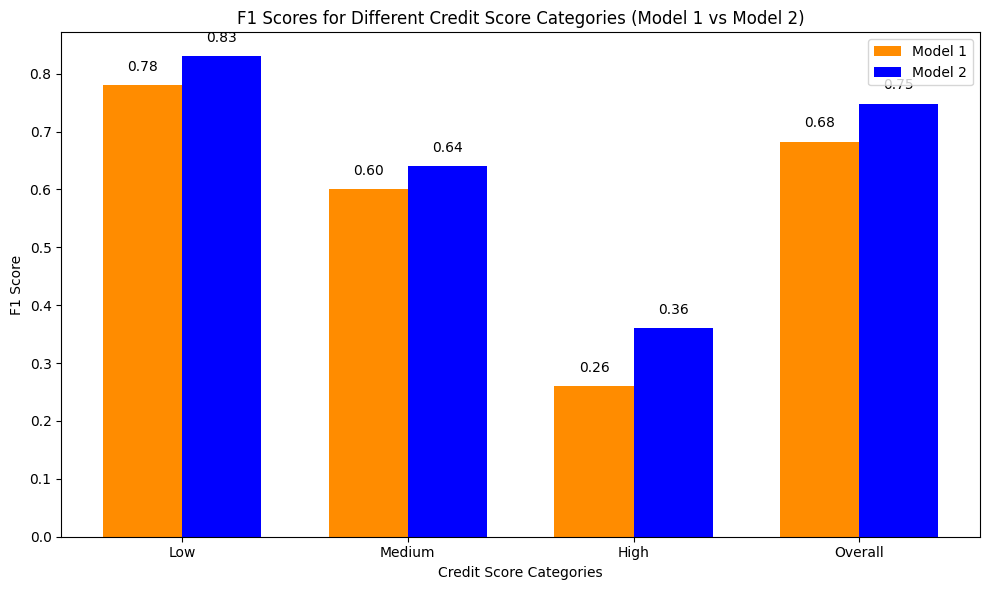

In [52]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Low', 'Medium', 'High', 'Overall']
model_1_f1_scores = [0.78, 0.60, 0.26, 0.682]  
model_2_f1_scores = [0.83, 0.64, 0.36, 0.748]  

# Position of bars for each category
x = np.arange(len(categories))

# Width of each bar
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for both models side by side
bars_model_1 = ax.bar(x - bar_width/2, model_1_f1_scores, bar_width, label='Model 1', color='darkorange')
bars_model_2 = ax.bar(x + bar_width/2, model_2_f1_scores, bar_width, label='Model 2', color='blue')

# Add text labels with F1 scores
for i, bar in enumerate(bars_model_1):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{model_1_f1_scores[i]:.2f}', 
            ha='center', va='bottom', fontsize=10)

for i, bar in enumerate(bars_model_2):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{model_2_f1_scores[i]:.2f}', 
            ha='center', va='bottom', fontsize=10)

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Credit Score Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Credit Score Categories (Model 1 vs Model 2)')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('./images/fig10.png')
plt.show()
